In [1]:
from keras.applications.resnet50 import ResNet50
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling="avg")

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [2]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

def get_image(fname, show=False):
    img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
    if img is None:
         return None
    if show:
         plt.imshow(img)
         plt.axis('off')
    img = cv2.resize(img, (224, 224))
    #img = np.swapaxes(img, 0, 2)
    #img = np.swapaxes(img, 1, 2)
    img = img[np.newaxis, :]
    
    #img = img.astype('float32') / 255.
    
    return img

In [4]:
import glob
import os

def process_files(folder_name, start_index=0):
    
    products = []
    index = start_index
    dim = 2048
    xb = np.empty(shape=[0, dim], dtype=np.float32)
    
    for imgfolderpath in glob.glob(folder_name + '/*'):
        productTitle = os.path.basename(imgfolderpath)
    
        for file in glob.glob(imgfolderpath + '/*'):
        #with open(file_name) as file:
        #for line in file:
            try:
                img = get_image(file)
                product = {}
                #fields = line.split(',')
                product['id'] = str(index)
                product['productTitle'] = productTitle #fields[0].strip()
                product['imageUrl'] = file #fields[1].strip()
                # download image to be featurized and preprocess it
                #file = mx.test_utils.download(product['imageUrl'])
                product['imageFileName'] = file
                # extract features

                features_batch = model.predict([img])
                features = features_batch[0]

                # the Knn algorithm we'll use requires float32 rather than the default float64
                xb = np.append(xb, [features.astype(np.float32)], axis=0)

                products.append(product)
                index += 1
            except:
                print("Something went wrong with the file: " + file)            
    return (products, xb)

In [5]:
products, train_features = process_files('/dataset/dataset-resized')


Something went wrong with the file: /dataset/dataset-resized\Aircraft parts\05_00045 — копия.jpg
Something went wrong with the file: /dataset/dataset-resized\Aircraft parts\06_00985a — копия.jpg
Something went wrong with the file: /dataset/dataset-resized\Aircraft parts\0b9e9f10f265536564e7c7becc239497 — копия.jpg
Something went wrong with the file: /dataset/dataset-resized\Aircraft parts\16_6033_0_universal_2_aluminum_flip_top_fuel_filler_cap_hot_rat_street_rod_muscle_car__55997.1545256653 — копия.jpg
Something went wrong with the file: /dataset/dataset-resized\Aircraft parts\1_3 — копия.jpg
Something went wrong with the file: /dataset/dataset-resized\Aircraft parts\1_How_to_Replace_a_Fuel_Filler_Cap_fuel_filler_cap — копия.jpg
Something went wrong with the file: /dataset/dataset-resized\Aircraft parts\29_060312_l — копия.jpg
Something went wrong with the file: /dataset/dataset-resized\Aircraft parts\33_nmx001_motone_monza_aluminum_fuel_cap_polished_1 — копия.jpg
Something went wrong

Something went wrong with the file: /dataset/dataset-resized\Metal object\84350833_w640_h640_cid409524_pid63449070_c66e3b5e.jpg
Something went wrong with the file: /dataset/dataset-resized\Metal object\Bronc_700x700.gif
Something went wrong with the file: /dataset/dataset-resized\Metal object\Deer_2_700x700.gif
Something went wrong with the file: /dataset/dataset-resized\Metal object\ec5f4b96c9ab6de3256072e4801b942d.thumb.gif
Something went wrong with the file: /dataset/dataset-resized\Metal object\Elk_700x700.gif
Something went wrong with the file: /dataset/dataset-resized\Metal object\f8000ca172d1f29be52ab6b381bc2657.thumb.gif
Something went wrong with the file: /dataset/dataset-resized\Metal object\fab_lok_image__78635.1416008095.210.210.gif
Something went wrong with the file: /dataset/dataset-resized\Metal object\file.gif
Something went wrong with the file: /dataset/dataset-resized\Metal object\Hex_Cap_Screw_2.gif
Something went wrong with the file: /dataset/dataset-resized\Metal o

Something went wrong with the file: /dataset/dataset-resized\Wildlife\dog.4918 — копия.jpg
Something went wrong with the file: /dataset/dataset-resized\Wildlife\dog.4922 — копия.jpg
Something went wrong with the file: /dataset/dataset-resized\Wildlife\dog.4923 — копия.jpg
Something went wrong with the file: /dataset/dataset-resized\Wildlife\dog.4924 — копия.jpg
Something went wrong with the file: /dataset/dataset-resized\Wildlife\DogCOV — копия.jpg
Something went wrong with the file: /dataset/dataset-resized\Wildlife\dogdeals_lowres_2x1_5751 — копия.jpg
Something went wrong with the file: /dataset/dataset-resized\Wildlife\dogdog_profile_image_5550ade194780dfc_300x300 — копия.jpeg
Something went wrong with the file: /dataset/dataset-resized\Wildlife\dogs_at_dogpark_768x503 — копия.png
Something went wrong with the file: /dataset/dataset-resized\Wildlife\Dogs_becoming_major_threat_to_wildlife — копия.jpg
Something went wrong with the file: /dataset/dataset-resized\Wildlife\Dogturf — копи

In [6]:
import pickle

In [7]:
with open('object_data_fixed.pickle', 'wb') as f:
    pickle.dump([products, train_features], f)

In [18]:
with open('object_data_fixed.pickle', 'rb') as f:
    products, train_features = pickle.load(f)

In [19]:
import sklearn
import sklearn.preprocessing

In [20]:
train_features = sklearn.preprocessing.normalize(train_features)

In [21]:
Y = []
for product in products:
    Y.append(product['productTitle'])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, Y, test_size=0.2)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [24]:
pred = neigh.predict(X_test)

In [25]:
dict = {}
ok = 0
for index, v in enumerate(pred):
    expected = y_test[index]
    if (expected == v):
        ok = ok + 1
    if expected not in dict:
        dict[expected] = {}
    if v not in dict[expected]:
        dict[expected][v] = 1
    else:
        dict[expected][v] = dict[expected][v] + 1

In [26]:
ok

3328

In [27]:
len(y_test)

4454

In [28]:
ok / len(y_test)

0.7471935339021104

In [29]:
dict

{'Metal object': {'Metal object': 391,
  'Tools': 26,
  'Metal_screw': 19,
  'Metal_nut': 37,
  'Aircraft parts': 12,
  'Metal_bolt': 24,
  'Tubes': 6,
  'Apron': 8,
  'pipe': 2,
  'Grass': 1,
  'Border': 1,
  'cylinders': 1,
  'trash': 1,
  'tires': 2,
  'fuel cap': 1,
  'metal': 1},
 'Aircraft parts': {'fuel cap': 17,
  'Aircraft parts': 97,
  'Metal object': 14,
  'Tools': 8,
  'Border': 1,
  'Apron': 6,
  'tires': 4,
  'metal': 5,
  'Metal_nut': 3,
  'Wildlife': 3,
  'Tubes': 2,
  'plastic': 2,
  'Chunks': 1,
  'cardboard': 1},
 'Wildlife': {'Wildlife': 240,
  'cat': 59,
  'Bird': 11,
  'Tools': 3,
  'dog': 6,
  'rat': 7,
  'Chunks': 1,
  'Aircraft parts': 3,
  'Apron': 4,
  'Grass': 2,
  'Tubes': 2,
  'Trees': 1},
 'Bird': {'Bird': 290,
  'Trees': 4,
  'Aircraft parts': 2,
  'Wildlife': 9,
  'Chunks': 3,
  'Tools': 4,
  'Apron': 2,
  'Grass': 1},
 'Grass': {'Grass': 168,
  'Bushes': 1,
  'Wildlife': 1,
  'Trees': 5,
  'Bird': 2,
  'Border': 1},
 'Tubes': {'pipe': 11,
  'Tubes': 16

In [30]:
import pandas as pd

dfObj = pd.DataFrame(dict)

dfObj = dfObj.reindex(sorted(dfObj.columns), axis=1)

# Transpose dataframe object
dfObj = dfObj.transpose()

dfObj = dfObj.reindex(sorted(dfObj.columns), axis=1)

dfObj

,Aircraft parts,Apron,Bird,Border,Bushes,Chunks,Grass,Metal object,Metal_bolt,Metal_nut,...,dog,fuel cap,glass,metal,paper,pipe,plastic,rat,tires,trash
Aircraft parts,97.0,6.0,NaN,1.0,NaN,1.0,NaN,14.0,NaN,3.0,...,NaN,17.0,NaN,5.0,NaN,NaN,2.0,NaN,4.0,NaN
Apron,1.0,237.0,1.0,1.0,NaN,NaN,1.0,4.0,NaN,NaN,...,NaN,NaN,1.0,1.0,72.0,1.0,6.0,NaN,NaN,3.0
Bird,2.0,2.0,290.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Border,NaN,1.0,NaN,41.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Bushes,NaN,2.0,NaN,NaN,17.0,NaN,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chunks,3.0,1.0,NaN,NaN,NaN,198.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Grass,NaN,NaN,2.0,1.0,1.0,NaN,168.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metal object,12.0,8.0,NaN,1.0,NaN,NaN,1.0,391.0,24.0,37.0,...,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN,2.0,1.0
Metal_bolt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metal_nut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


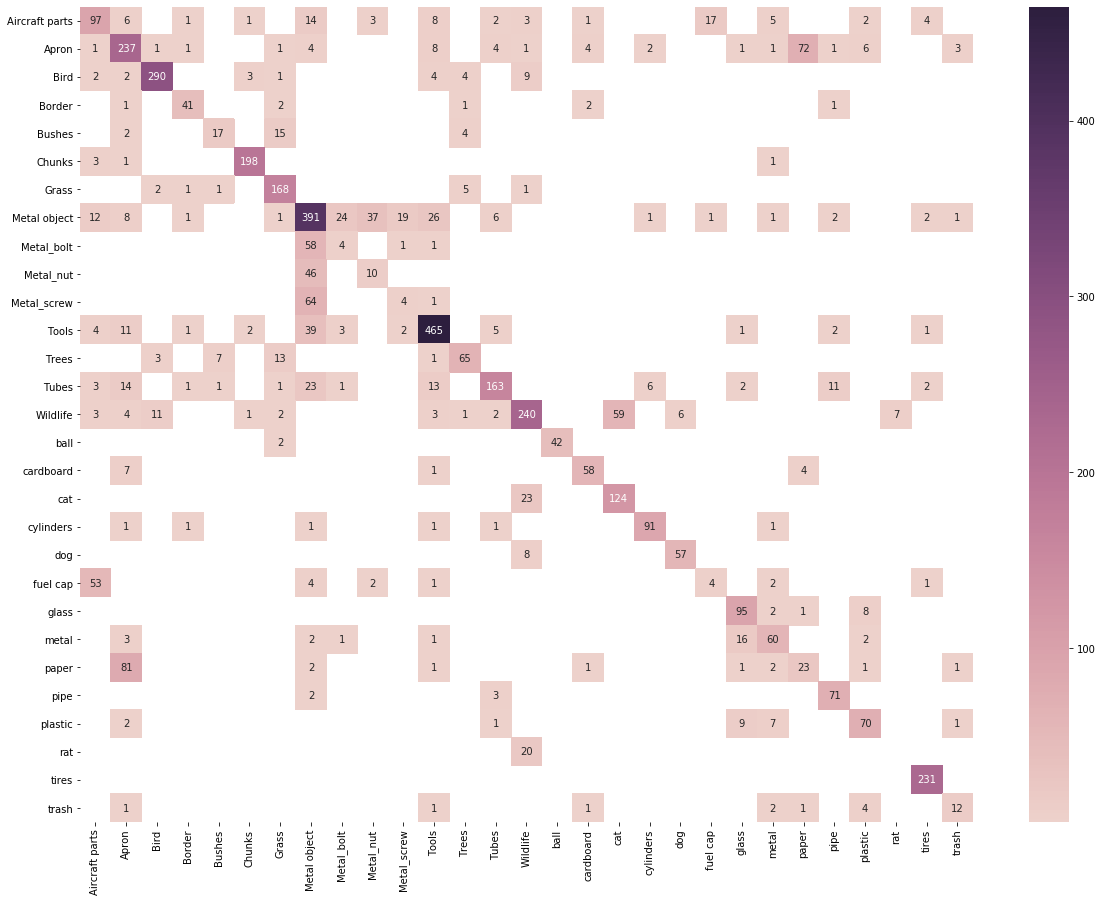

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,15))
_ = sns.heatmap(dfObj, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax, fmt='g')

In [ ]:
#########################################

In [108]:
products_add, train_features_add = process_files('/dataset/addition')

Something went wrong with the file: /dataset/addition\fuel cap\ac_cobra_lemans_gas_cap_2.gif
Something went wrong with the file: /dataset/addition\fuel cap\part_310586001.gif
Something went wrong with the file: /dataset/addition\fuel cap\pdint_2_640594__2__1857.15718670913813.gif
Something went wrong with the file: /dataset/addition\fuel cap\pko22087h.gif
Something went wrong with the file: /dataset/addition\fuel cap\w08660_TAPÓN_DEPÓSITO_ACERBIS_PLÁSTICO_350x350.jpg


In [109]:
train_features_add = sklearn.preprocessing.normalize(train_features_add)

In [110]:
Y_add = []
for product in products_add:
    Y_add.append(product['productTitle'])

In [111]:
X_train_add, X_test_add, y_train_add, y_test_add = train_test_split(train_features_add, Y_add, test_size=0.7)

In [117]:
X_train = np.concatenate((X_train, X_train_add))
X_test = np.concatenate((X_test, X_test_add))
y_train = np.concatenate((y_train, y_train_add))
y_test = np.concatenate((y_test, y_test_add))

In [118]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [119]:
pred = neigh.predict(X_test)

In [120]:
dict = {}
ok = 0
for index, v in enumerate(pred):
    expected = y_test[index]
    if (expected == v):
        ok = ok + 1
    if expected not in dict:
        dict[expected] = {}
    if v not in dict[expected]:
        dict[expected][v] = 1
    else:
        dict[expected][v] = dict[expected][v] + 1

In [121]:
ok

1070

In [122]:
len(y_test)

1191

In [123]:
ok / len(y_test)

0.8984047019311503

In [124]:
dfObj = pd.DataFrame(dict)

dfObj = dfObj.reindex(sorted(dfObj.columns), axis=1)

# Transpose dataframe object
dfObj = dfObj.transpose()

dfObj = dfObj.reindex(sorted(dfObj.columns), axis=1)

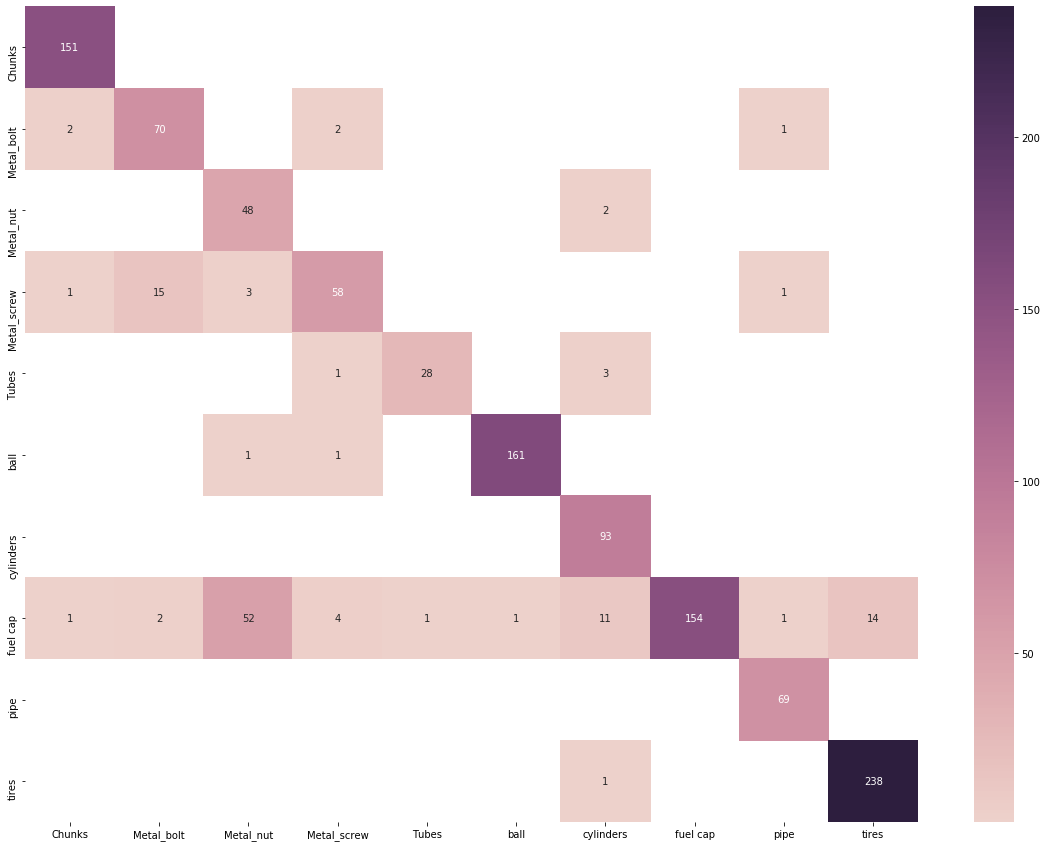

In [125]:
fig, ax = plt.subplots(figsize=(20,15))
_ = sns.heatmap(dfObj, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax, fmt='g')

In [126]:
dict

{'Chunks': {'Chunks': 151},
 'tires': {'tires': 238, 'cylinders': 1},
 'Metal_bolt': {'Metal_bolt': 70, 'pipe': 1, 'Metal_screw': 2, 'Chunks': 2},
 'pipe': {'pipe': 69},
 'Metal_nut': {'Metal_nut': 48, 'cylinders': 2},
 'Metal_screw': {'Metal_screw': 58,
  'Metal_bolt': 15,
  'Chunks': 1,
  'pipe': 1,
  'Metal_nut': 3},
 'cylinders': {'cylinders': 93},
 'Tubes': {'Tubes': 28, 'Metal_screw': 1, 'cylinders': 3},
 'fuel cap': {'Metal_nut': 52,
  'fuel cap': 154,
  'cylinders': 11,
  'Metal_bolt': 2,
  'tires': 14,
  'Metal_screw': 4,
  'ball': 1,
  'Chunks': 1,
  'Tubes': 1,
  'pipe': 1},
 'ball': {'ball': 161, 'Metal_nut': 1, 'Metal_screw': 1}}

In [152]:
with open('object_data_small.pickle', 'rb') as f:
    products, train_features = pickle.load(f)

In [153]:
train_features = sklearn.preprocessing.normalize(train_features)

In [154]:
Y = []
for product in products:
    Y.append(product['productTitle'])

In [155]:
X_train, X_test, y_train, y_test = train_test_split(train_features, Y, test_size=0.2)

In [156]:
X_train_add, X_test_add, y_train_add, y_test_add = train_test_split(train_features_add, Y_add, test_size=0.2)

In [157]:
X_train = np.concatenate((X_train, X_train_add))
X_test = np.concatenate((X_test, X_test_add))
y_train = np.concatenate((y_train, y_train_add))
y_test = np.concatenate((y_test, y_test_add))

In [158]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [159]:
pred = neigh.predict(X_test)

In [160]:
dict = {}
ok = 0
for index, v in enumerate(pred):
    expected = y_test[index]
    if (expected == v):
        ok = ok + 1
    if expected not in dict:
        dict[expected] = {}
    if v not in dict[expected]:
        dict[expected][v] = 1
    else:
        dict[expected][v] = dict[expected][v] + 1

In [161]:
ok

860

In [162]:
len(y_test)

903

In [163]:
ok / len(y_test)

0.9523809523809523

In [164]:
dfObj = pd.DataFrame(dict)

dfObj = dfObj.reindex(sorted(dfObj.columns), axis=1)

# Transpose dataframe object
dfObj = dfObj.transpose()

dfObj = dfObj.reindex(sorted(dfObj.columns), axis=1)

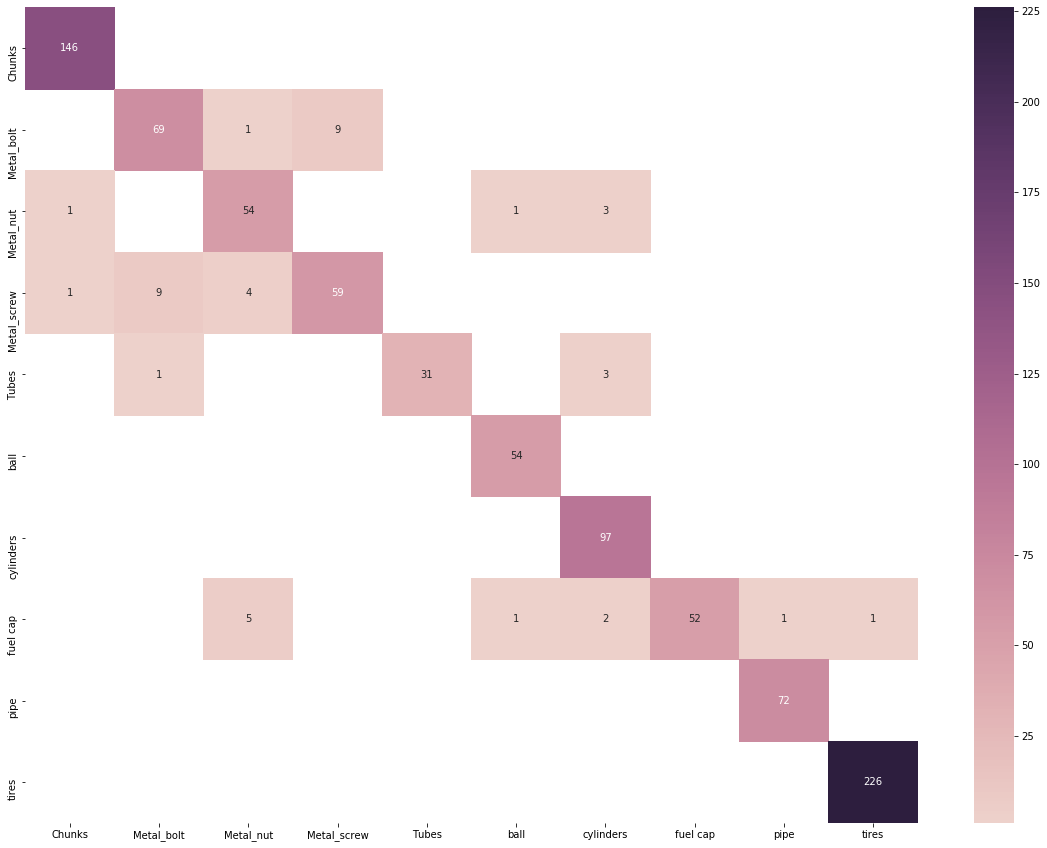

In [165]:
fig, ax = plt.subplots(figsize=(20,15))
_ = sns.heatmap(dfObj, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax, fmt='g')